In [1]:
from imports import *
from model import NeuralNetwork
from load_split import create_transformer
import glob
from torchvision.transforms import ToPILImage

In [2]:
model = NeuralNetwork()
model.load_state_dict(torch.load('model/model.pt'))
model.eval()

NeuralNetwork(
  (conv_stack): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ce

In [6]:
pictures = glob.glob(rootdir + "/**/"+"*.jpg", recursive=True)
selected_pictures = np.random.choice(pictures, size=10)

In [4]:
transform = create_transformer()

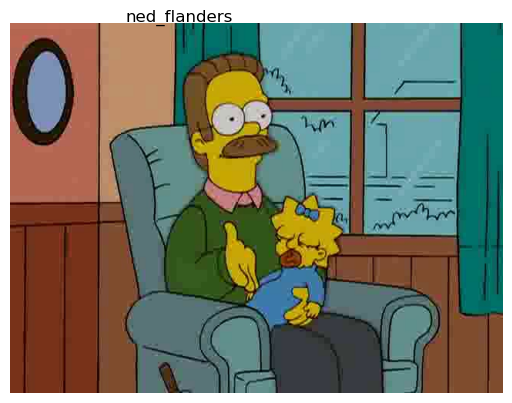

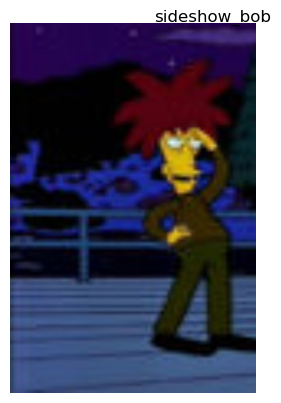

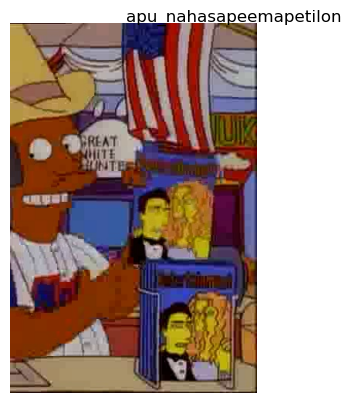

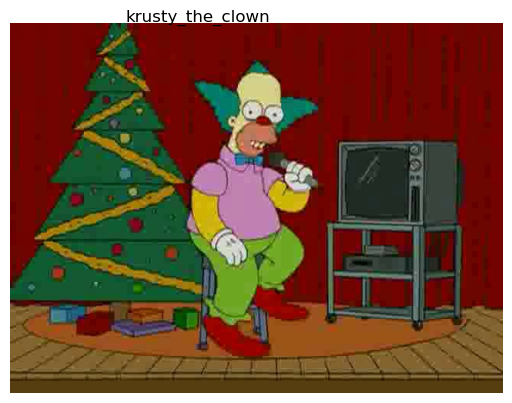

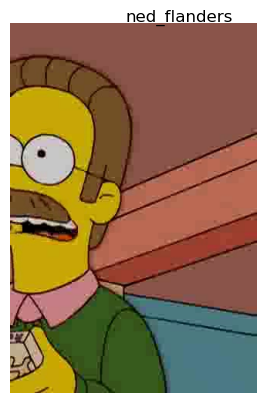

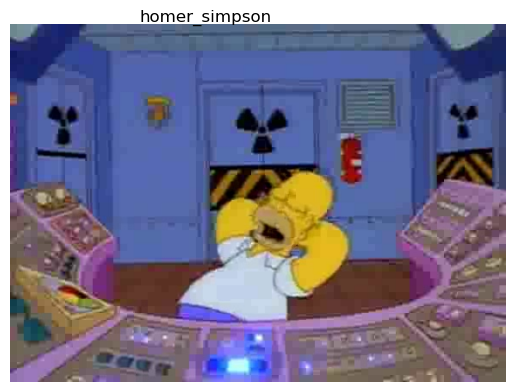

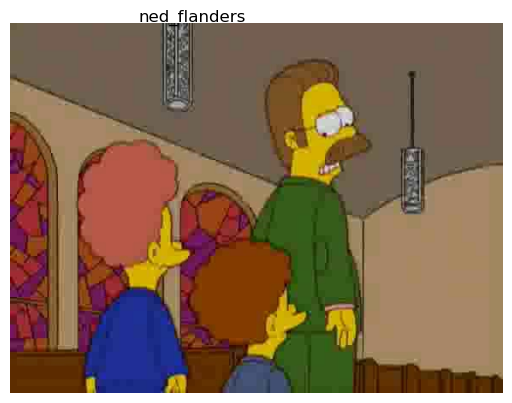

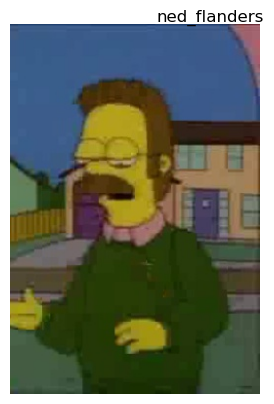

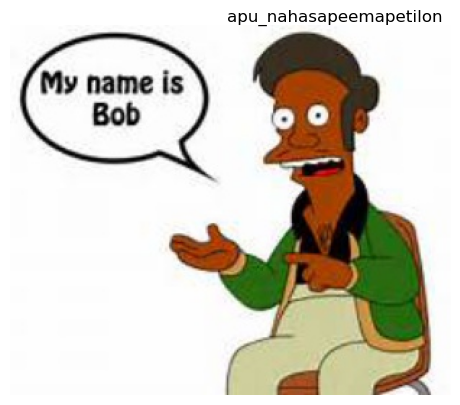

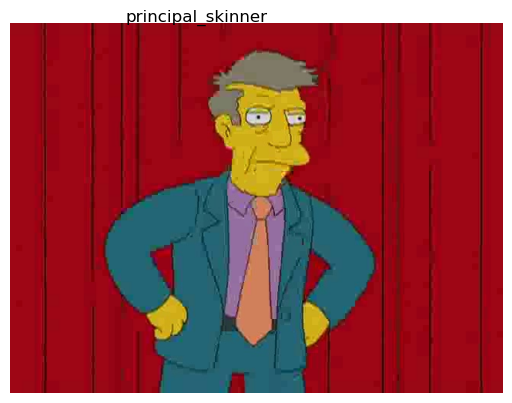

In [7]:
for raw_img in selected_pictures:
    img = read_image(raw_img)
    transformed_img = transform(ToPILImage()(img))
    transformed_img = torch.reshape(transformed_img, shape =(1, transformed_img.shape[0], transformed_img.shape[1], transformed_img.shape[2]))
    predict = model(transformed_img)
    classlist = sorted(classlist)
    plt.figure()
    plt.text(150, -3,classlist[torch.argmax(predict)], fontsize=12)
    plt.imshow(img.permute((1,2,0)))
    plt.axis('off')